In [6]:
#Import all the necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [7]:
#Using pandas read the data into the notebook

df = pd.read_csv('/Users/mehakagrawal/Desktop/CVD_cleaned.csv')

print(df.head())

  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

In [8]:
#Understand the data

df.shape

(308854, 19)

In [9]:
df.describe

<bound method NDFrame.describe of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No 

In [10]:
#Print the data types of the attributes

df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [11]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [12]:
#Check for any null/missing values

df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [13]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [14]:
#Define the target variable and convert it to binary values (0,1)

target = 'Heart_Disease'
df['Heart_Disease'] = df['Heart_Disease'].map({'No':0,'Yes':1})
print('')
print(df['Heart_Disease'].value_counts())


0    283883
1     24971
Name: Heart_Disease, dtype: int64


In [15]:
## Create numerical and categorical columns and print the length

numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 11 Categorical variables
There are 7 Numerical variables


In [16]:
#One-hot encoding to convert categorical to numerical variables

df = pd.get_dummies(df, columns=categorical, drop_first=True)

In [17]:
#X represents input features and y is the target value

X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

In [18]:
#Perform standard scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Split the dataset into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# Train a Gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Prediction on test set
y_pred = gb_clf.predict(X_test)
y_prob = gb_clf.predict_proba(X_test)[:, 1]

In [22]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.54      0.05      0.10      4997

    accuracy                           0.92     61771
   macro avg       0.73      0.52      0.53     61771
weighted avg       0.89      0.92      0.89     61771

ROC-AUC Score: 0.83


In [58]:
# Perform GridSearchCV with cross-validation and obtain the Best Parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [23]:
#Import visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Count of people with/without Heart Disease')

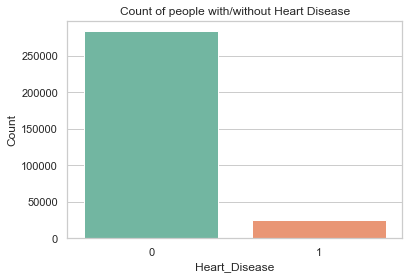

In [24]:
#Barplot
sns.set(style="whitegrid")
ax = sns.countplot(x = target, 
                data=df,
                palette='Set2',
                order = df['Heart_Disease'].value_counts().index
                )
ax.set_ylabel('Count')
plt.title('Count of people with/without Heart Disease')

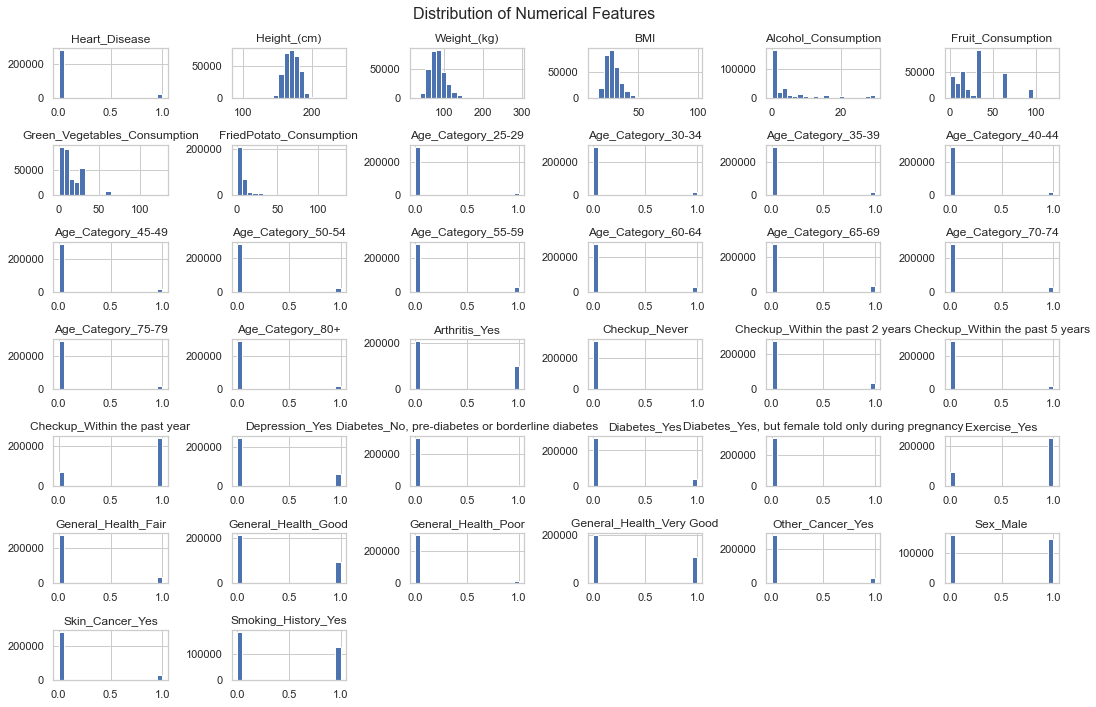

In [25]:
#Histogram
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

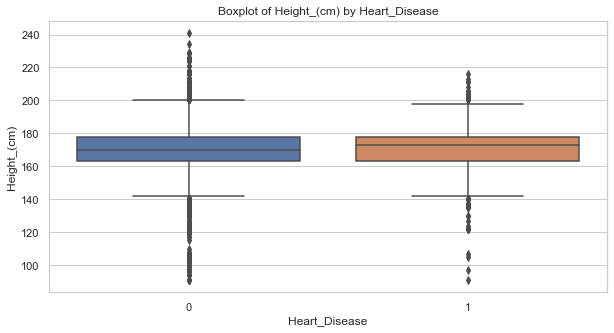

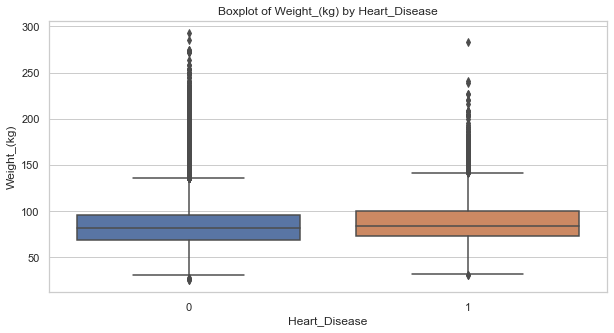

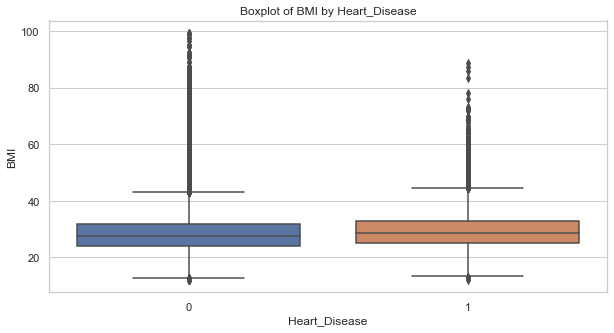

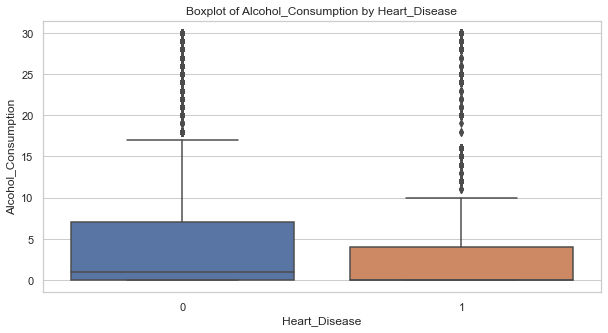

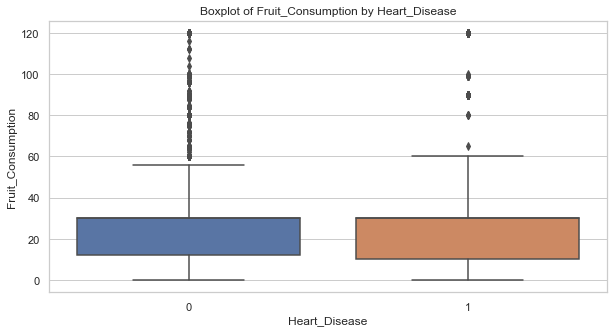

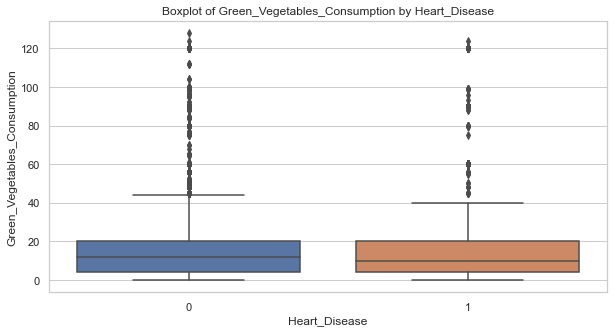

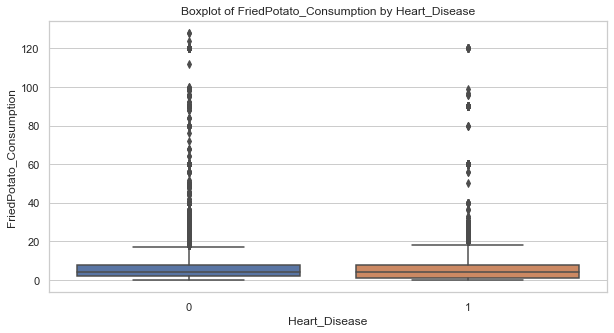

In [26]:
#Boxplot
numerical_columns = df.select_dtypes(include=['float64']).columns
target = 'Heart_Disease'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f'Boxplot of {col} by {target}')
        plt.show()

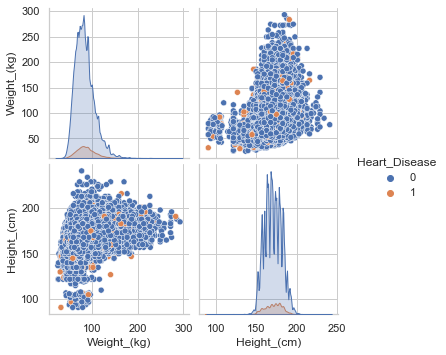

In [27]:
#Pairplot
sns.pairplot(df[['Weight_(kg)', 'Height_(cm)', 'Heart_Disease']], hue='Heart_Disease')
plt.show()

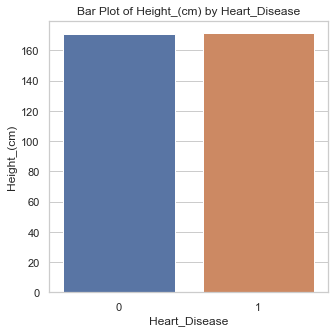

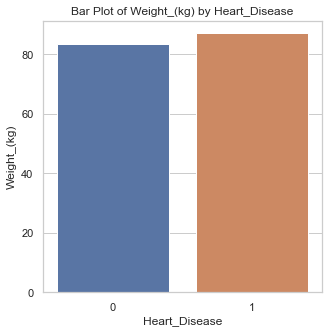

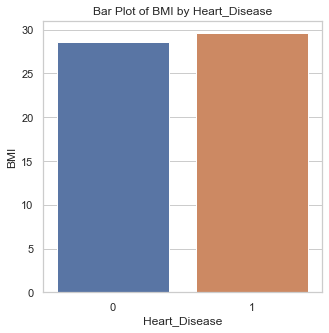

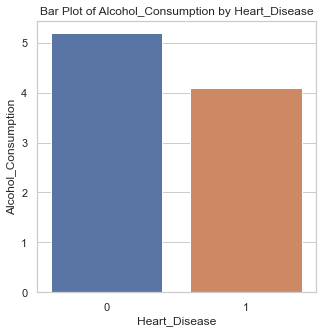

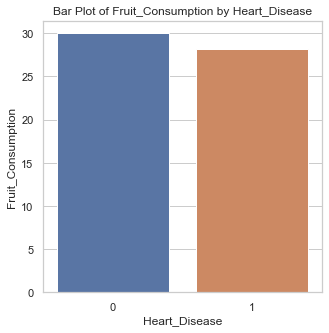

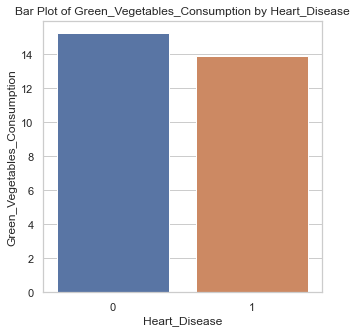

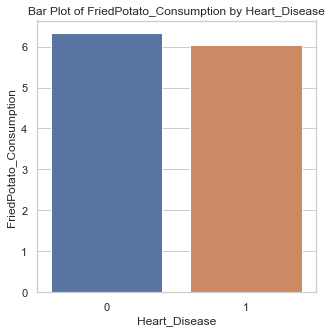

In [28]:
#Barplot
numerical_columns = df.select_dtypes(include=['float64']).columns
target = 'Heart_Disease'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(5, 5))
        sns.barplot(x=target, y=col, data=df, ci=None)
        plt.title(f'Bar Plot of {col} by {target}')
        plt.show()

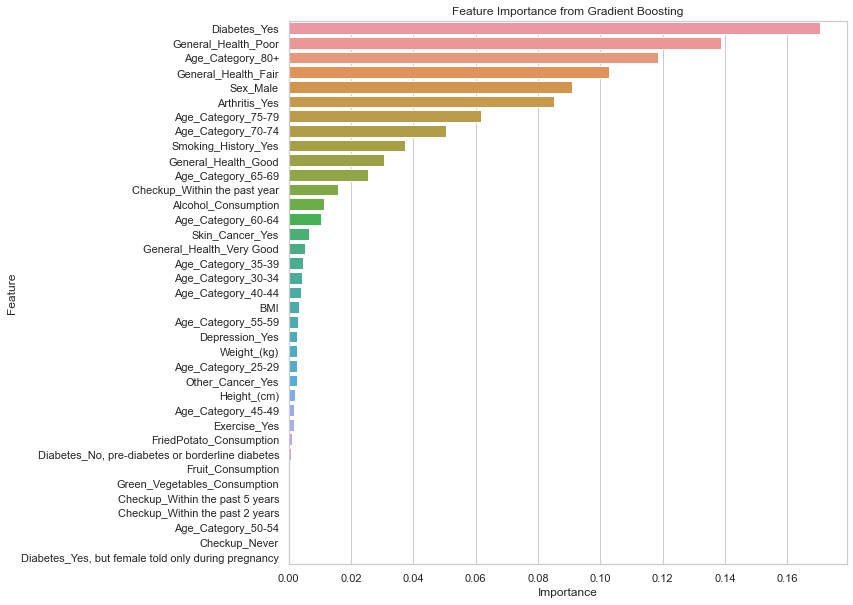

In [30]:
#Plot for Feature Importance
fea_imp = gb_clf.feature_importances_
fea = X.columns

imp_df = pd.DataFrame({'Feature': fea, 'Importance': fea_imp})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title('Feature Importance from Gradient Boosting')
plt.show()

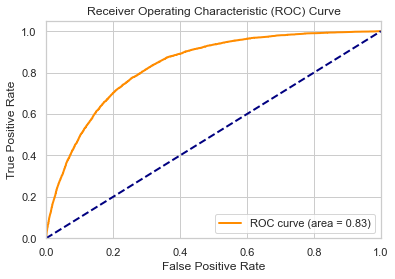

In [31]:
#ROC curve
from sklearn.metrics import roc_curve, auc

y_prob = gb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

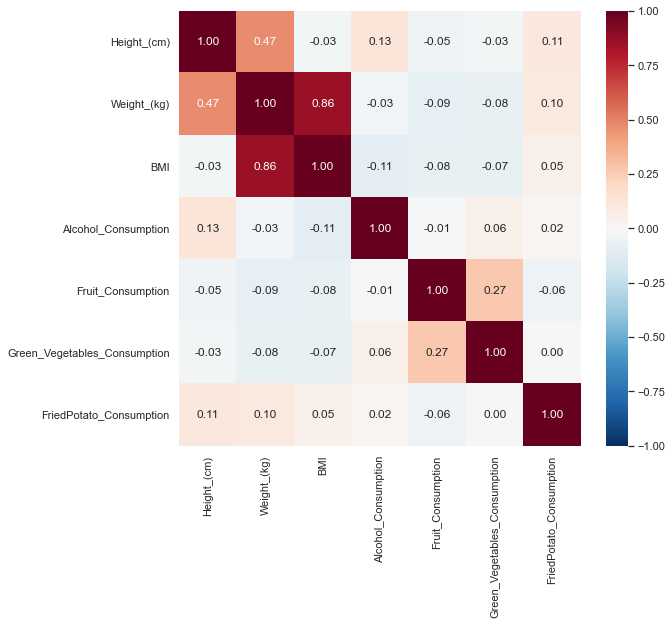

In [34]:
#Heatmap
import numpy as np

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(9,8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, cmap='RdBu_r', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()